In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import xml.etree.ElementTree as ET
import os
import cv2 as cv
import tensorflow as tf
from wordcloud import WordCloud
import re
from collections import defaultdict
import itertools
from collections import Counter
import glob
from PIL import Image

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D,AveragePooling2D,TimeDistributed
from tensorflow.keras.models import Model
import pickle
from PIL import Image
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
# abnormal = []
# for file in os.listdir('.'):
#    print(file)
#    abnormal.append(cv.imread(file))
# len(abnormal)

In [ ]:
df = pd.read_excel (r'/content/drive/MyDrive/Main Capstone/Final_Input.xlsx')
print (df)

                    Images  ... Gender
0    A_ADI_LAKSHMI_65Y_F_1  ...      F
1    A_ADI_LAKSHMI_65Y_F_2  ...      F
2    A_ADI_LAKSHMI_65Y_F_3  ...      F
3    A_ADI_LAKSHMI_65Y_F_4  ...      F
4    A_ADI_LAKSHMI_65Y_F_5  ...      F
..                     ...  ...    ...
555         SK_ASHA_35Y_16  ...      F
556         SK_ASHA_35Y_17  ...      F
557         SK_ASHA_35Y_18  ...      F
558         SK_ASHA_35Y_19  ...      F
559         SK_ASHA_35Y_20  ...      F

[560 rows x 4 columns]


In [ ]:
df.shape

(560, 4)

In [ ]:
df.columns

Index(['Images', 'Impression', 'Age', 'Gender'], dtype='object')

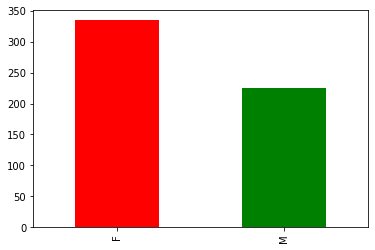

In [ ]:
df['Gender'].value_counts().plot(kind='bar',color=['r','g']);

In [ ]:

# df['Gender'].value_counts().index

In [ ]:
# df.groupby('Gender').Age.hist()

Gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

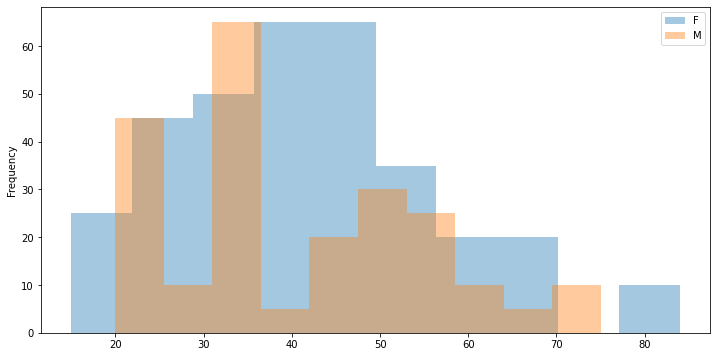

In [ ]:
df.groupby('Gender').Age.plot(kind='hist', figsize=[12,6], alpha=.4, legend=True)

In [ ]:
# df.loc[df['Gender'] == 'M','Age']

In [ ]:
df['label'] = [1 if re.search( 'S1', x) else 0 for x in df['Impression']]

In [ ]:
df.head()

,Images,Impression,Age,Gender,label
0,A_ADI_LAKSHMI_65Y_F_1,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
1,A_ADI_LAKSHMI_65Y_F_2,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
2,A_ADI_LAKSHMI_65Y_F_3,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
3,A_ADI_LAKSHMI_65Y_F_4,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
4,A_ADI_LAKSHMI_65Y_F_5,Flaval hypertrophy is at all levels in lumbar ...,65,F,1


In [ ]:
df.tail()

,Images,Impression,Age,Gender,label
555,SK_ASHA_35Y_16,No significant abnormality detected.,35,F,0
556,SK_ASHA_35Y_17,No significant abnormality detected.,35,F,0
557,SK_ASHA_35Y_18,No significant abnormality detected.,35,F,0
558,SK_ASHA_35Y_19,No significant abnormality detected.,35,F,0
559,SK_ASHA_35Y_20,No significant abnormality detected.,35,F,0


In [ ]:
df[(df['Gender'] == 'M') & (df['label'] == 1)]

,Images,Impression,Age,Gender,label
10,A_GOWRI_SHANKAR_30Y_M_1,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
11,A_GOWRI_SHANKAR_30Y_M_2,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
12,A_GOWRI_SHANKAR_30Y_M_3,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
13,A_GOWRI_SHANKAR_30Y_M_4,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
14,A_GOWRI_SHANKAR_30Y_M_5,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
...,...,...,...,...,...
370,U_UDAYA_CHANDRA_RAO_57Y_M_1,Minimal scoliossis of lumbar spine with convex...,57,M,1
371,U_UDAYA_CHANDRA_RAO_57Y_M_2,Minimal scoliossis of lumbar spine with convex...,57,M,1
372,U_UDAYA_CHANDRA_RAO_57Y_M_3,Minimal scoliossis of lumbar spine with convex...,57,M,1
373,U_UDAYA_CHANDRA_RAO_57Y_M_4,Minimal scoliossis of lumbar spine with convex...,57,M,1


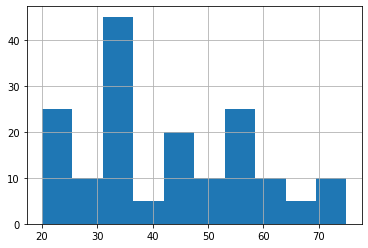

In [ ]:
df[(df['Gender'] == 'M') & (df['label'] == 1)].Age.hist()

In [ ]:
df[(df['Gender'] == 'F') & (df['label'] == 1)]

,Images,Impression,Age,Gender,label
0,A_ADI_LAKSHMI_65Y_F_1,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
1,A_ADI_LAKSHMI_65Y_F_2,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
2,A_ADI_LAKSHMI_65Y_F_3,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
3,A_ADI_LAKSHMI_65Y_F_4,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
4,A_ADI_LAKSHMI_65Y_F_5,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
...,...,...,...,...,...
375,U_VIJAYA_45Y_F_1,Grade 1 retrolisthesis is at L5-S1 level with ...,45,F,1
376,U_VIJAYA_45Y_F_2,Grade 1 retrolisthesis is at L5-S1 level with ...,45,F,1
377,U_VIJAYA_45Y_F_3,Grade 1 retrolisthesis is at L5-S1 level with ...,45,F,1
378,U_VIJAYA_45Y_F_4,Grade 1 retrolisthesis is at L5-S1 level with ...,45,F,1


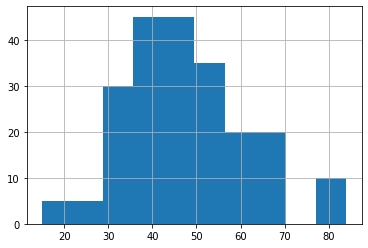

In [ ]:
df[(df['Gender'] == 'F') & (df['label'] == 1)].Age.hist()

In [ ]:
df[(df['Gender'] == 'M') & (df['label'] == 1)].shape[0]

165

In [ ]:
df[(df['Gender'] == 'F') & (df['label'] == 1)].shape[0]

215

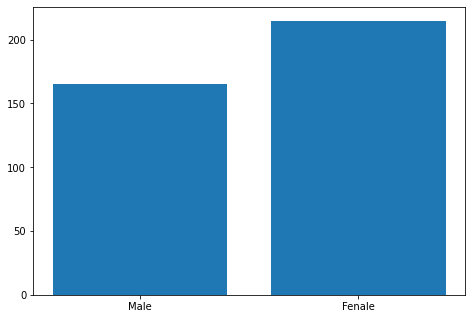

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Gender = ['Male', 'Fenale']
Effected = [df[(df['Gender'] == 'M') & (df['label'] == 1)].shape[0],df[(df['Gender'] == 'F') & (df['label'] == 1)].shape[0]]
ax.bar(Gender, Effected)
plt.show()

In [ ]:
data = df[['Images','Impression']]

In [ ]:
data.head()

,Images,Impression
0,A_ADI_LAKSHMI_65Y_F_1,Flaval hypertrophy is at all levels in lumbar ...
1,A_ADI_LAKSHMI_65Y_F_2,Flaval hypertrophy is at all levels in lumbar ...
2,A_ADI_LAKSHMI_65Y_F_3,Flaval hypertrophy is at all levels in lumbar ...
3,A_ADI_LAKSHMI_65Y_F_4,Flaval hypertrophy is at all levels in lumbar ...
4,A_ADI_LAKSHMI_65Y_F_5,Flaval hypertrophy is at all levels in lumbar ...


In [ ]:
dataset = data.copy()

In [ ]:
dataset.rename(columns = {'Images':'Image_path','Impression':'Finding'}, inplace = True)

In [ ]:
dataset

,Image_path,Finding
0,A_ADI_LAKSHMI_65Y_F_1,Flaval hypertrophy is at all levels in lumbar ...
1,A_ADI_LAKSHMI_65Y_F_2,Flaval hypertrophy is at all levels in lumbar ...
2,A_ADI_LAKSHMI_65Y_F_3,Flaval hypertrophy is at all levels in lumbar ...
3,A_ADI_LAKSHMI_65Y_F_4,Flaval hypertrophy is at all levels in lumbar ...
4,A_ADI_LAKSHMI_65Y_F_5,Flaval hypertrophy is at all levels in lumbar ...
...,...,...
555,SK_ASHA_35Y_16,No significant abnormality detected.
556,SK_ASHA_35Y_17,No significant abnormality detected.
557,SK_ASHA_35Y_18,No significant abnormality detected.
558,SK_ASHA_35Y_19,No significant abnormality detected.


In [ ]:
# img = []
# for i,file in enumerate(dataset['Image_path']):
#   #  print(file)
#    img.append(cv.imread(file+'.jpg'))

# dataset['Img_array'] = img

In [ ]:
# dataset.loc[1,'Img_array']

In [ ]:
dataset = dataset.sample(frac=1).reset_index(drop=True).copy()

In [ ]:

print('Dataset Shape:', dataset.shape)

Dataset Shape: (560, 2)


In [ ]:
def absolute_path(x):
    '''Makes the path absolute '''
    x = 'Data/'+ x + '.jpg'
    return x

In [ ]:
dataset['Image_path'] = dataset['Image_path'].apply(lambda x : absolute_path(x)) # making the paths absolute

In [ ]:
dataset.head()

,Image_path,Finding
0,Data/D_MAHIPAL__20Y_10.jpg,No significant abnormality detected.
1,Data/A_SWAPNA_KIRAN_43Y_F_5.jpg,"Diffuse disc bulge is at L4-L5, L5-S1 levels, ..."
2,Data/KHASIM_BIAG_31Y_16.jpg,No significant abnormality detected.
3,Data/P_HARSHITHA_15Y_4.jpg,No significant abnormality detected.
4,Data/A_MUSALAIAH_55Y_M_3.jpg,"Diffuse disc bulge is at L4-L5, L5-S1 levels, ..."


In [ ]:
# path + dataset['Image_path'][0]

In [ ]:
# def load_image(img_name):
#     image = Image.open(img_name)
#     X = np.asarray(image)
#     X = np.asarray(X)
#     X = preprocess_input(X)
#     X = resize(X, (224,224,3))
#     # X = np.expand_dims(X, axis=0)
#     # print(X.shape)
#     X = np.asarray(X)
    
#     return X

# def load_image(img_name):
#     image = Image.open(img_name)
#     X = np.asarray(image.convert("RGB"))
#     X = np.asarray(X)
#     X = preprocess_input(X)
#     X = resize(X, (224,224,3))
#     X = np.expand_dims(X, axis=0)
#     X = np.asarray(X)
    
#     return X

In [ ]:
# img = load_image(dataset['Image_path'][0])
# print("img",img)
# plt.imshow(img)

In [ ]:
# image_desc_plotter(dataset, 5, 'finding')

In [ ]:
# abnormal.extend(normal)

In [ ]:
h = []
w = []
for i in tqdm(np.unique(dataset['Image_path'].values)):
    img = cv.imread(i)
    h.append(img.shape[0])
    w.append(img.shape[0])

  1%|          | 5/560 [00:02<04:15,  2.17it/s]


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Height Plot')
plt.ylabel('Heights')
plt.xlabel('--Images--')
sns.scatterplot(range(len(h)), h)
plt.subplot(122)
plt.title('Width Plot')
plt.ylabel('Widths')
plt.xlabel('--Images--')
sns.scatterplot(range(len(w)), h)

In [ ]:
chex = densenet.DenseNet121(include_top=False, weights = None, input_shape=(224,224,3), pooling="avg")

In [ ]:
X = chex.output
X = Dense(14, activation="sigmoid", name="predictions")(X)
model = Model(inputs=chex.input, outputs=X)

In [ ]:
chex.output

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'avg_pool')>

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# This contains weights for the CheXNet network
# It has the weight  for the last layer of the chexnet network as well, therefore an additional layer is added in the
# previous cell block to fit the weights which can be removed later.
model.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [ ]:

model = Model(inputs = model.input, outputs = model.layers[-2].output)
# model.summary will show you all the layers in the model

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:

def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    
    return X

In [ ]:
# img = load_image(dataset['Image_path'][0])
# # plt.imshow(img[0])

In [ ]:
dataset.shape

(560, 2)

In [ ]:
dataset.head()

,Image_path,Finding
0,Data/A_LAKSHMI_KOTI_70Y_M_2.jpg,Degenerative changes in lumbar spine. Post ope...
1,Data/P_HARSHITHA_15Y_4.jpg,No significant abnormality detected.
2,Data/SK_ASHA_35Y_11.jpg,No significant abnormality detected.
3,Data/B_PARAIAH_48Y_17.jpg,No significant abnormality detected.
4,Data/D_GOPI_KRISHNA_REDDY_20Y_M_5.jpg,"Diffuse disc bulge is at L3-L4, L4-L5, L5-S1 l..."


In [ ]:
t = 'Data/A_ADI_LAKSHMI_65Y_F_1.jpg'
t.split('/')[1].split('.')[0]

'A_ADI_LAKSHMI_65Y_F_1'

In [ ]:
def train_test_split(data):
    # persons = data.tolist()
    persons_train = data[:400]
    persons_test = data[401:]
    return persons_train, persons_test

In [ ]:
images_train, images_test = train_test_split(dataset)

In [ ]:
images_train.tail()

,Image_path,Finding
395,Data/A_SRINIVAS_REDDY_52Y_M_4.jpg,"Central disc extrusion is at L3-4 level, compr..."
396,Data/K_PADMA_37Y_F_1.jpg,"Central disc protrusion is at L4-5,L5-S1 level..."
397,Data/SK_ASHA_35Y_1.jpg,No significant abnormality detected.
398,Data/N_SESHAMMA_60Y_F_4.jpg,PLIF Status noted at L4 to S1 level.Spondyloly...
399,Data/A_MUSALAIAH_55Y_M_3.jpg,"Diffuse disc bulge is at L4-L5, L5-S1 levels, ..."


In [ ]:
a,b = images_train.values[0]
a

'Data/A_LAKSHMI_KOTI_70Y_M_2.jpg'

In [ ]:
images_test

,Image_path,Finding
401,Data/A_VENKATESWARLU_75Y_M_2.jpg,Spondylolysis with grade 1 listhesis is at L5-...
402,Data/A_SWAPNA_KIRAN_43Y_F_5.jpg,"Diffuse disc bulge is at L4-L5, L5-S1 levels, ..."
403,Data/K_PREMA_LATHA_45Y_14.jpg,No significant abnormality detected.
404,Data/D_MAHIPAL__20Y_1.jpg,No significant abnormality detected.
405,Data/SK_ASHA_35Y_12.jpg,No significant abnormality detected.
...,...,...
555,Data/A_LAKSHMI_KOTI_70Y_M_3.jpg,Degenerative changes in lumbar spine. Post ope...
556,Data/K_NAGA_LAKSHMI_34Y_F_2.jpg,"Central disc protrusion is at L4-5,L5-S1 level..."
557,Data/SK_MUBEENA_26Y_F_4.jpg,Schmorl's nodes in D10 to D12 vertebrae.Diffus...
558,Data/N_ANKALAMMA_47Y_F_1.jpg,"Small Disc osteophyte complexes are at C3-C4, ..."


In [ ]:
def image_features(train,test):
    Xnet_features_attention = {}
    
    for img1 in tqdm(train):
        i1 = load_image(img1)
        img1_features = model.predict(i1)
        # print('img1_features',img1_features.shape)
        # (None,1024)

        input_ = img1_features
        key = img1.split('/')[1].split('.')[0]
        # input_ = tf.reshape(input_, (img1_features.shape[0], -1, img1_features.shape[-1]))
        # print('input_',input_.shape)
        Xnet_features_attention[key] = input_
    
    for img1 in tqdm(test):
        i1 = load_image(img1)
        img1_features = model.predict(i1)


        # i2 = load_image(img2)
        # img2_features = model.predict(i2)

        input_ = img1_features
        key = img1.split('/')[1].split('.')[0]
        # input_ = tf.reshape(input_, (input_.shape[0], -1, input_.shape[-1]))

        Xnet_features_attention[key] = input_
        
    return Xnet_features_attention

In [ ]:
# Xnet_features_attention = image_features(images_train['Image_path'])

In [ ]:
images_train['Image_path'][0]

'Data/A_LAKSHMI_KOTI_70Y_M_2.jpg'

In [ ]:
Xnet_features_attention = image_features(images_train['Image_path'], images_test['Image_path'])

100%|██████████| 159/159 [01:26<00:00,  1.84it/s]


In [ ]:
Xnet_features_attention['T_RAJESWARI_45Y_F_1'].shape

(1, 1024)

In [ ]:
# Xnet_features_attention['Scanned Images/CXR1_1_IM-0001_0'].shape

In [ ]:

# save the file for future use
f = open('Image_features_attention.pickle','wb')
pickle.dump(Xnet_features_attention, f)
f.close()

# DA and Cleaning

In [ ]:
images_train.head()

,Image_path,Finding
0,Data/A_LAKSHMI_KOTI_70Y_M_2.jpg,Degenerative changes in lumbar spine. Post ope...
1,Data/P_HARSHITHA_15Y_4.jpg,No significant abnormality detected.
2,Data/SK_ASHA_35Y_11.jpg,No significant abnormality detected.
3,Data/B_PARAIAH_48Y_17.jpg,No significant abnormality detected.
4,Data/D_GOPI_KRISHNA_REDDY_20Y_M_5.jpg,"Diffuse disc bulge is at L3-L4, L4-L5, L5-S1 l..."


In [ ]:
# dataset['Finding'].str.contains('.|,',regex=True)

In [ ]:
def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, " ")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        temp = ' '.join(e for e in line.split())  # removes multiple_spaces
        temp = re.sub("'",'',temp)                # removes apostrophes
        temp = re.sub('\.', ' .', temp)           # addding aspace before fullstop
        temp = re.sub(r'\.\.+', '.', temp)        # Removes multiple full stops from the text
        new_text.append(temp.lower())             # Converts to lowercase
    return new_text


In [ ]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = rem_punctuations(text)
    new_text = multiple_spaces(new_text)
  
    return new_text

In [ ]:
images_train['Finding'] = text_preprocessing(images_train['Finding'])
images_test['Finding'] = text_preprocessing(images_test['Finding'])
# Flaval hypertrophy is at all levels in lumbar spine.Diffuse disc bulge is at L4-L5, L5-S1 levels, compressing thecal sac with focal spinal canal narrowing, encroaching bilateral neural foramen. 

In [ ]:
images_train.head(5)

,Image_path,Finding
0,Data/A_LAKSHMI_KOTI_70Y_M_2.jpg,degenerative changes in lumbar spine . post op...
1,Data/P_HARSHITHA_15Y_4.jpg,no significant abnormality detected .
2,Data/SK_ASHA_35Y_11.jpg,no significant abnormality detected .
3,Data/B_PARAIAH_48Y_17.jpg,no significant abnormality detected .
4,Data/D_GOPI_KRISHNA_REDDY_20Y_M_5.jpg,diffuse disc bulge is at l3-l4 l4-l5 l5-s1 lev...


In [ ]:
l = [len(e.split()) for e in images_train['Finding'].values]
max_len= max(l)

In [ ]:
images_train.head(5)

,Image_path,Finding
0,Data/A_LAKSHMI_KOTI_70Y_M_2.jpg,degenerative changes in lumbar spine . post op...
1,Data/P_HARSHITHA_15Y_4.jpg,no significant abnormality detected .
2,Data/SK_ASHA_35Y_11.jpg,no significant abnormality detected .
3,Data/B_PARAIAH_48Y_17.jpg,no significant abnormality detected .
4,Data/D_GOPI_KRISHNA_REDDY_20Y_M_5.jpg,diffuse disc bulge is at l3-l4 l4-l5 l5-s1 lev...


Text(0, 0.5, 'Number of words')

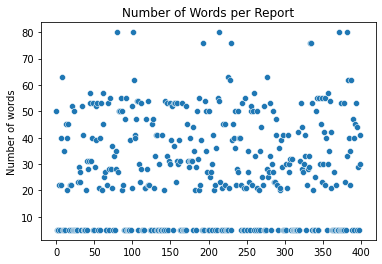

In [ ]:
plt.title('Number of Words per Report')
sns.scatterplot(range(images_train.shape[0]), l)
plt.ylabel('Number of words')

In [ ]:

l = []
for i in images_train['Finding'].values:
    l.extend(i.split())


c = Counter(l)

words = []
count = []
for k,v in c.items():
    words.append(k)
    count.append(v)
words_count = list(zip(count, words))


top_50_words = sorted(words_count)[::-1][:50]
bottom_50_words = sorted(words_count)[:50]

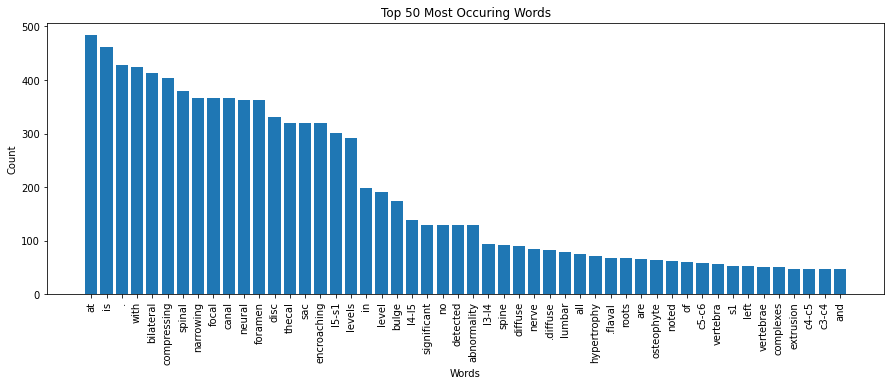

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(range(50), [c for c,w in top_50_words])
plt.title('Top 50 Most Occuring Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(ticks=range(50), labels=[w for c,w in top_50_words], rotation=90);

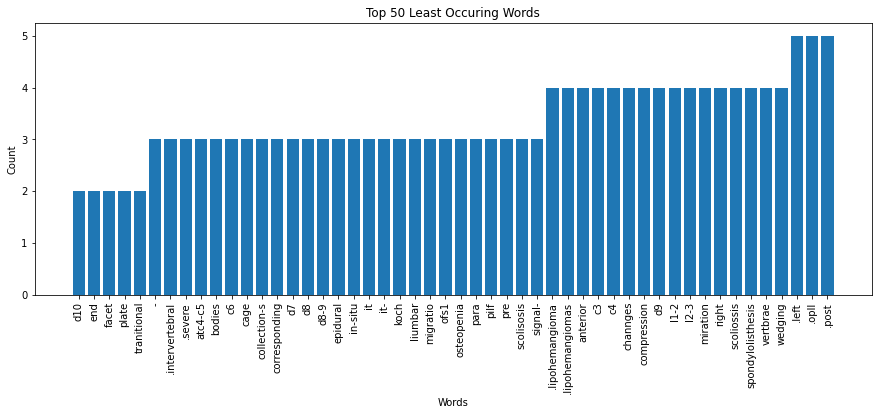

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(range(50), [c for c,w in bottom_50_words])
plt.title('Top 50 Least Occuring Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(ticks=range(50), labels=[w for c,w in bottom_50_words], rotation=90);

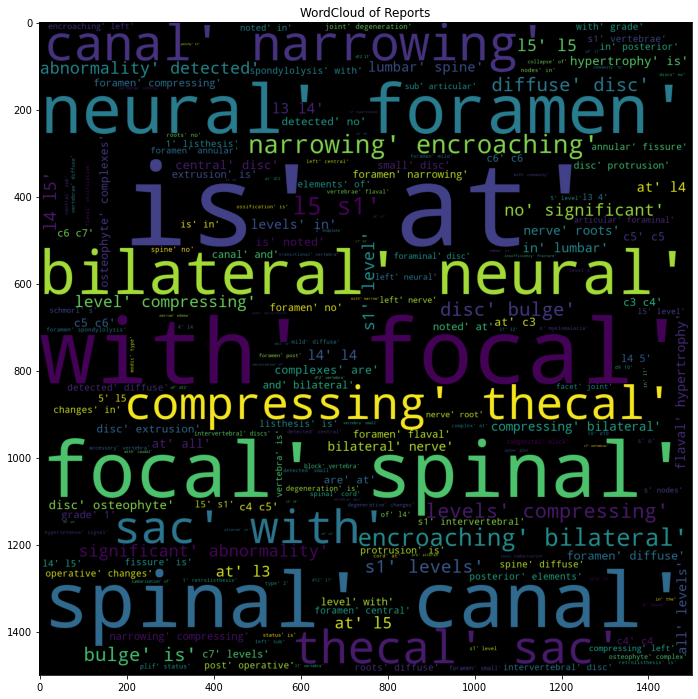

In [ ]:
w = WordCloud(height=1500, width=1500).generate(str(l))

plt.figure(figsize=(12,12))
plt.title('WordCloud of Reports')
plt.imshow(w);

In [ ]:
def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return '<start>' + ' ' + x + ' ' + '<end>'
images_train['Finding'] = images_train['Finding'].apply(lambda x : remodelling(x))
images_test['Finding'] = images_test['Finding'].apply(lambda x : remodelling(x))

In [ ]:
# save the cleaned data(STRUCTURED DATA)
images_train.to_csv('Train_Data.csv', index=False)
images_test.to_csv('Test_Data.csv', index=False)

#Encoder - Decoder

In [ ]:
train_dataset = pd.read_csv('Train_Data.csv')
test_dataset = pd.read_csv('Test_Data.csv')

In [ ]:
train_dataset.shape, test_dataset.shape

((400, 2), (159, 2))

In [ ]:
def get_id(x):
  id = x.split('/')[1].split('.')[0]
  return id

In [ ]:
train_dataset['id'] = train_dataset['Image_path'].apply(get_id)
test_dataset['id'] = test_dataset['Image_path'].apply(get_id)

In [ ]:
test_dataset

,Image_path,Finding,id
0,Data/A_VENKATESWARLU_75Y_M_2.jpg,<start> spondylolysis with grade 1 listhesis i...,A_VENKATESWARLU_75Y_M_2
1,Data/A_SWAPNA_KIRAN_43Y_F_5.jpg,<start> diffuse disc bulge is at l4-l5 l5-s1 l...,A_SWAPNA_KIRAN_43Y_F_5
2,Data/K_PREMA_LATHA_45Y_14.jpg,<start> no significant abnormality detected . ...,K_PREMA_LATHA_45Y_14
3,Data/D_MAHIPAL__20Y_1.jpg,<start> no significant abnormality detected . ...,D_MAHIPAL__20Y_1
4,Data/SK_ASHA_35Y_12.jpg,<start> no significant abnormality detected . ...,SK_ASHA_35Y_12
...,...,...,...
154,Data/A_LAKSHMI_KOTI_70Y_M_3.jpg,<start> degenerative changes in lumbar spine ....,A_LAKSHMI_KOTI_70Y_M_3
155,Data/K_NAGA_LAKSHMI_34Y_F_2.jpg,<start> central disc protrusion is at l4-5 l5-...,K_NAGA_LAKSHMI_34Y_F_2
156,Data/SK_MUBEENA_26Y_F_4.jpg,<start> schmorl s nodes in d10 to d12 vertebra...,SK_MUBEENA_26Y_F_4
157,Data/N_ANKALAMMA_47Y_F_1.jpg,<start> small disc osteophyte complexes are at...,N_ANKALAMMA_47Y_F_1


In [ ]:
train_dataset.head()

,Image_path,Finding,id
0,Data/A_LAKSHMI_KOTI_70Y_M_2.jpg,<start> degenerative changes in lumbar spine ....,A_LAKSHMI_KOTI_70Y_M_2
1,Data/P_HARSHITHA_15Y_4.jpg,<start> no significant abnormality detected . ...,P_HARSHITHA_15Y_4
2,Data/SK_ASHA_35Y_11.jpg,<start> no significant abnormality detected . ...,SK_ASHA_35Y_11
3,Data/B_PARAIAH_48Y_17.jpg,<start> no significant abnormality detected . ...,B_PARAIAH_48Y_17
4,Data/D_GOPI_KRISHNA_REDDY_20Y_M_5.jpg,<start> diffuse disc bulge is at l3-l4 l4-l5 l...,D_GOPI_KRISHNA_REDDY_20Y_M_5


In [ ]:
test_dataset

,Image_path,Finding,id
0,Data/A_VENKATESWARLU_75Y_M_2.jpg,<start> spondylolysis with grade 1 listhesis i...,A_VENKATESWARLU_75Y_M_2
1,Data/A_SWAPNA_KIRAN_43Y_F_5.jpg,<start> diffuse disc bulge is at l4-l5 l5-s1 l...,A_SWAPNA_KIRAN_43Y_F_5
2,Data/K_PREMA_LATHA_45Y_14.jpg,<start> no significant abnormality detected . ...,K_PREMA_LATHA_45Y_14
3,Data/D_MAHIPAL__20Y_1.jpg,<start> no significant abnormality detected . ...,D_MAHIPAL__20Y_1
4,Data/SK_ASHA_35Y_12.jpg,<start> no significant abnormality detected . ...,SK_ASHA_35Y_12
...,...,...,...
154,Data/A_LAKSHMI_KOTI_70Y_M_3.jpg,<start> degenerative changes in lumbar spine ....,A_LAKSHMI_KOTI_70Y_M_3
155,Data/K_NAGA_LAKSHMI_34Y_F_2.jpg,<start> central disc protrusion is at l4-5 l5-...,K_NAGA_LAKSHMI_34Y_F_2
156,Data/SK_MUBEENA_26Y_F_4.jpg,<start> schmorl s nodes in d10 to d12 vertebra...,SK_MUBEENA_26Y_F_4
157,Data/N_ANKALAMMA_47Y_F_1.jpg,<start> small disc osteophyte complexes are at...,N_ANKALAMMA_47Y_F_1


In [ ]:
pad_size = 153   # Max length

In [ ]:
X_train, X_test = train_dataset['id'], test_dataset['id']
y_train, y_test = train_dataset['Finding'], test_dataset['Finding']

In [ ]:
X_test

0        A_VENKATESWARLU_75Y_M_2
1         A_SWAPNA_KIRAN_43Y_F_5
2           K_PREMA_LATHA_45Y_14
3               D_MAHIPAL__20Y_1
4                 SK_ASHA_35Y_12
                 ...            
154       A_LAKSHMI_KOTI_70Y_M_3
155       K_NAGA_LAKSHMI_34Y_F_2
156           SK_MUBEENA_26Y_F_4
157          N_ANKALAMMA_47Y_F_1
158    N_VENKATA_RAVAMMA_51Y_F_3
Name: id, Length: 159, dtype: object

In [ ]:
y_test

0      <start> spondylolysis with grade 1 listhesis i...
1      <start> diffuse disc bulge is at l4-l5 l5-s1 l...
2      <start> no significant abnormality detected . ...
3      <start> no significant abnormality detected . ...
4      <start> no significant abnormality detected . ...
                             ...                        
154    <start> degenerative changes in lumbar spine ....
155    <start> central disc protrusion is at l4-5 l5-...
156    <start> schmorl s nodes in d10 to d12 vertebra...
157    <start> small disc osteophyte complexes are at...
158    <start> transitional vertebra is at s1 level- ...
Name: Finding, Length: 159, dtype: object

In [ ]:
X_train

0            A_LAKSHMI_KOTI_70Y_M_2
1                 P_HARSHITHA_15Y_4
2                    SK_ASHA_35Y_11
3                  B_PARAIAH_48Y_17
4      D_GOPI_KRISHNA_REDDY_20Y_M_5
                   ...             
395        A_SRINIVAS_REDDY_52Y_M_4
396                 K_PADMA_37Y_F_1
397                   SK_ASHA_35Y_1
398              N_SESHAMMA_60Y_F_4
399             A_MUSALAIAH_55Y_M_3
Name: id, Length: 400, dtype: object

In [ ]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(y_train.values)


In [ ]:
tokenizer.word_index['start']

9

In [ ]:
y_train

0      <start> degenerative changes in lumbar spine ....
1      <start> no significant abnormality detected . ...
2      <start> no significant abnormality detected . ...
3      <start> no significant abnormality detected . ...
4      <start> diffuse disc bulge is at l3-l4 l4-l5 l...
                             ...                        
395    <start> central disc extrusion is at l3-4 leve...
396    <start> central disc protrusion is at l4-5 l5-...
397    <start> no significant abnormality detected . ...
398    <start> plif status noted at l4 to s1 level .s...
399    <start> diffuse disc bulge is at l4-l5 l5-s1 l...
Name: Finding, Length: 400, dtype: object

In [ ]:
f = open('Image_features_attention.pickle','rb') # contains the features from chexNet
Xnet_Features = pickle.load(f)
f.close()

In [ ]:
Xnet_Features['D_JAYA_RAMULU_55Y_M_2'].shape

(1, 1024)

In [ ]:
# Xnet_Features

In [ ]:
f = open('glove.840B.300d.pkl','rb') # 300d glove vectors  
glove_vectors = pickle.load(f)
f.close()

In [ ]:
vocab_size = len(tokenizer.word_index.keys()) + 1

In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
for word, i in tokenizer.word_index.items():
    if word in glove_vectors.keys():
        vec = glove_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

In [ ]:
BATCH_SIZE = 14

In [ ]:
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = Xnet_Features[id_.decode('utf-8')][0]
    return img_feature, report

In [ ]:
Xnet_Features['SK_ASHA_35Y_13']

array([[1.7220763e-04, 1.3975544e-03, 1.4828999e-03, ..., 8.3188087e-01,
        7.9705030e-01, 6.7962575e-01]], dtype=float32)

In [ ]:
def create_dataset(img_name, caption):
    dataset = tf.data.Dataset.from_tensor_slices((img_name, caption))
    print("Type",type(dataset))
    print(dataset)
    # for ele in dataset:
    #     print(ele)
    # print(tf.data.Dataset.from_tensor_slices((img_name, caption)))
  #   print('dataset', dataset)
  # # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.string]),
                           num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # # Shuffle and batch
    dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [ ]:
train_generator = create_dataset(X_train, y_train)


Type <class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>
<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>


In [ ]:
type(train_generator)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
train_generator

<PrefetchDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.string)>

In [ ]:
# for ele, x in train_generator:
#       print(ele,x)

In [ ]:
type(train_generator)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
train_generator

<PrefetchDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.string)>

In [ ]:
X_train.shape, y_train.shape

((400,), (400,))

In [ ]:
y_train

0      <start> degenerative changes in lumbar spine ....
1      <start> no significant abnormality detected . ...
2      <start> no significant abnormality detected . ...
3      <start> no significant abnormality detected . ...
4      <start> diffuse disc bulge is at l3-l4 l4-l5 l...
                             ...                        
395    <start> central disc extrusion is at l3-4 leve...
396    <start> central disc protrusion is at l4-5 l5-...
397    <start> no significant abnormality detected . ...
398    <start> plif status noted at l4 to s1 level .s...
399    <start> diffuse disc bulge is at l4-l5 l5-s1 l...
Name: Finding, Length: 400, dtype: object

In [ ]:
X_train

0            A_LAKSHMI_KOTI_70Y_M_2
1                 P_HARSHITHA_15Y_4
2                    SK_ASHA_35Y_11
3                  B_PARAIAH_48Y_17
4      D_GOPI_KRISHNA_REDDY_20Y_M_5
                   ...             
395        A_SRINIVAS_REDDY_52Y_M_4
396                 K_PADMA_37Y_F_1
397                   SK_ASHA_35Y_1
398              N_SESHAMMA_60Y_F_4
399             A_MUSALAIAH_55Y_M_3
Name: id, Length: 400, dtype: object

In [ ]:
train_generator

<PrefetchDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.string)>

In [ ]:
def bytes_to_string(arr):
    '''The generator gives provides data in bytes. This function converts them back to strings for manipulation'''
    for i in range(len(arr)):
        arr[i] = arr[i].decode('utf-8')
    return arr

In [ ]:
def convert(images, reports):
    '''This function takes the batch of data and converts them into a new dataset(A WORD BY WORD DATASET)'''
    imgs = []
    in_reports = []
    out_reports = []
    for i in range(len(images)):
        sequence = [tokenizer.word_index[e] for e in reports[i].split() if e in tokenizer.word_index.keys()]
      #  print(sequence)
        for j in range(1,len(sequence)):

            in_seq = sequence[:j]
            out_seq = sequence[j]
            out_seq = tf.keras.utils.to_categorical(out_seq, num_classes=vocab_size)

            imgs.append(images[i])
          #  print(in_seq)
            in_reports.append(in_seq)
           # print(out_seq)
            out_reports.append(out_seq)
        
    return np.array(imgs), np.array(in_reports), np.array(out_reports)

In [ ]:
np.random.seed(42)

##fixing tensorflow RS
tf.random.set_seed(32)

##python RS
random.seed(12)

In [ ]:
# input1 = Input(shape=(49,1024), name='Image_1')
# dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)

# input2 = Input(shape=(82), name='Text_Input')
# emb_layer = Embedding(input_dim = vocab_size, output_dim = 300, input_length=82, mask_zero=True, trainable=False, 
#                 weights=[embedding_matrix], name="Embedding_layer")
# emb = emb_layer(input2)

# LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
#             kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
#             recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
#             bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
# #LSTM1_output = LSTM1(emb)

# LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
#             kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
#             recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
#             bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
# LSTM2_output = LSTM2(LSTM1)

# dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)

# dec =  tf.keras.layers.Add()([dense1, dropout1])

# fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
# fc1_output = fc1(dec)
# dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
# output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
# output = output_layer(dropout2)

# encoder_decoder = Model(inputs = [input1, input2], outputs = output)
# encoder_decoder.summary()

In [ ]:
input1 = Input(shape=(1024), name='Image_1')
dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)
input2 = Input(shape=(82), name='Text_Input')
emb_layer = Embedding(input_dim = vocab_size, output_dim = 300, input_length=82, mask_zero=True, trainable=False, 
                weights=[embedding_matrix], name="Embedding_layer")
emb = emb_layer(input2)

LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
#LSTM1_output = LSTM1(emb)

LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
LSTM2_output = LSTM2(LSTM1)

# distributed = TimeDistributed(Dense(56))(LSTM2_output)
# pool = AveragePooling1D()(distributed)

dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)
dec =  tf.keras.layers.Add()([dense1, dropout1])

fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
fc1_output = fc1(dec)
dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
output = output_layer(dropout2)

encoder_decoder = Model(inputs = [input1, input2], outputs = output)
encoder_decoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Text_Input (InputLayer)         [(None, 82)]         0                                            
__________________________________________________________________________________________________
Embedding_layer (Embedding)     (None, 82, 300)      54900       Text_Input[0][0]                 
__________________________________________________________________________________________________
LSTM1 (LSTM)                    (None, 82, 256)      570368      Embedding_layer[0][0]            
__________________________________________________________________________________________________
Image_1 (InputLayer)            [(None, 1024)]       0                                            
____________________________________________________________________________________________

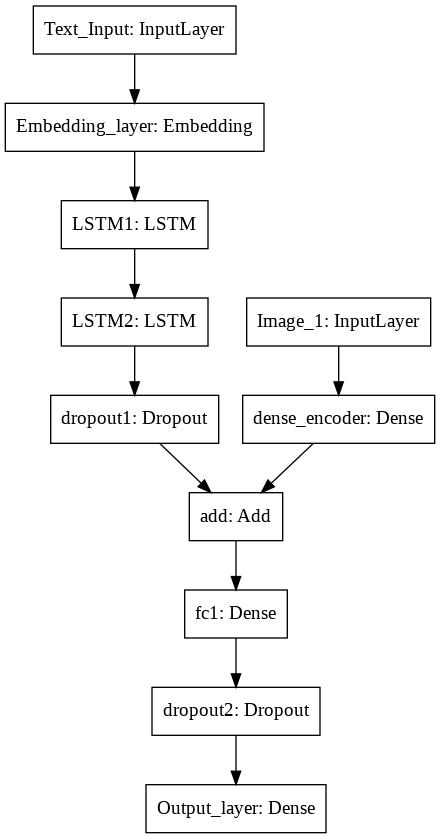

In [ ]:
tf.keras.utils.plot_model(encoder_decoder)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)

In [ ]:
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='auto')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))
    
    #calculating the loss
    loss_ = loss_function(y_true, y_pred)
    
    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)
    
    #applying the mask to loss
    loss_ = loss_*mask
    
    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [ ]:
encoder_decoder.compile(optimizer, loss = maskedLoss)

In [ ]:

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/train'
val_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
val_summary_writer = tf.summary.create_file_writer(val_log_dir)

In [ ]:
epoch_train_loss = []
epoch_val_loss = []

for epoch in range(20):
    print('EPOCH : ',epoch+1)
    start = time.time()
    batch_loss_tr = 0
    batch_loss_vl = 0
    
    for img, report in train_generator:
       
        r1 = bytes_to_string(report.numpy())
        # print(f'Image shapee : {img.shape}')
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=82, padding='post')
        # print(img_input,rep_input,output_word)
        results = encoder_decoder.train_on_batch([img_input, rep_input], output_word)
        # print(f'Results ---> {results}')
        
        batch_loss_tr += results

    train_loss = batch_loss_tr/(X_train.shape[0]//14)
 #   print('Saving Tensorboard')
    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss, step = epoch)
    
    # for img, report in cv_generator:
        
    #     r1 = bytes_to_string(report.numpy())
    #     img_input, rep_input, output_word = convert(img.numpy(), r1)
    #     rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
    #     results = encoder_decoder.test_on_batch([img_input, rep_input], output_word)
    #     batch_loss_vl += results
    
    # val_loss = batch_loss_vl/(X_cv.shape[0]//14)
    
    # with val_summary_writer.as_default():
    #     tf.summary.scalar('loss', val_loss, step = epoch)

    epoch_train_loss.append(train_loss)

    # epoch_val_loss.append(val_loss)
    
    # print('Training Loss: {},  Val Loss: {}'.format(train_loss, val_loss))
    print('Training Loss: {},'.format(train_loss))
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))   
    encoder_decoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.h5')

EPOCH :  1
Training Loss: 0.02278177792738591,
Time Taken for this Epoch : 98.13814616203308 sec
EPOCH :  2
Training Loss: 0.016254404027547156,
Time Taken for this Epoch : 141.91623997688293 sec
EPOCH :  3
Training Loss: 0.012760828382202558,
Time Taken for this Epoch : 141.92268824577332 sec
EPOCH :  4
Training Loss: 0.010079942577119385,
Time Taken for this Epoch : 141.9214539527893 sec
EPOCH :  5
Training Loss: 0.008261431158254189,
Time Taken for this Epoch : 84.31388688087463 sec
EPOCH :  6
Training Loss: 0.0067973118109096375,
Time Taken for this Epoch : 141.91569352149963 sec
EPOCH :  7
Training Loss: 0.005737851889404867,
Time Taken for this Epoch : 84.32837343215942 sec
EPOCH :  8
Training Loss: 0.005112565879244357,
Time Taken for this Epoch : 83.5151526927948 sec
EPOCH :  9
Training Loss: 0.004353752185124904,
Time Taken for this Epoch : 82.75461077690125 sec
EPOCH :  10
Training Loss: 0.003791933405279581,
Time Taken for this Epoch : 84.10814499855042 sec
EPOCH :  11
Train

In [ ]:
%pwd

'/content/drive/My Drive/Main Capstone'

## Inference Setup

In [ ]:
# encoder
encoder_input = encoder_decoder.input[0]
encoder_output = encoder_decoder.get_layer('dense_encoder').output
encoder_model = Model(encoder_input, encoder_output)

# decoder# 
text_input = encoder_decoder.input[1]
enc_output = Input(shape=(256,), name='Enc_Output')
text_output = encoder_decoder.get_layer('LSTM2').output
add1 = tf.keras.layers.Add()([text_output, enc_output])
fc_1 = fc1(add1)
decoder_output = output_layer(fc_1)

decoder_model = Model(inputs = [text_input, enc_output], outputs = decoder_output)

## Greedy Search

In [ ]:

def greedysearch(img):
    image = Xnet_Features[img]
    input_ = 'start'
    image_features = encoder_model.predict(image)
    
    result = []
    for i in range(82):
        input_tok = [tokenizer.word_index[w] for w in input_.split()]
        input_padded = pad_sequences([input_tok], 82, padding='post')
        predictions = decoder_model.predict([input_padded, image_features])
        arg = np.argmax(predictions)
        if arg != 7:   # endseq
            result.append(tokenizer.index_word[arg])
            input_ = input_ + ' ' + tokenizer.index_word[arg]
        else:
            break
    rep = ' '.join(e for e in result)
    return rep

In [ ]:
test_dataset['id'].values[36]

'A_GOWRI_SHANKAR_30Y_M_1'

## Eg: 1

In [ ]:
res36 = greedysearch(test_dataset['id'].values[36]) # result after 20 epochs
res36

'operative changes in posterior elements of l4 l5 s1 vertebrae .central disc extrusion is at level'

In [ ]:
Diffuse disc bulge is at L5-S1 level, compressing thecal sac with focal spinal canal narrowing, encroaching bilateral neural foramen.

In [ ]:
w = '<start>'
tokenizer.word_index['cage']

178

#Eg: 1

#Eg: 2

In [ ]:
res72 = greedysearch(test_dataset['id'].values[72]) # result after 20 epochs
res72

'nodes in l1 to l5 vertebrae .diffuse disc bulge is at level'

In [ ]:
y_test[72]

'<start> tranitional vertebra is s1 level- lumbarisation of s1 vertebra accessory vertebra .small disc osteophyte complexes are at c3-c4 c4-c5 c5-c6 levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .diffuse disc bulge is at l3-l4 l4-l5 l5-s1 levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . <end>'

In [ ]:
test_dataset[].values[72] # original

#Eg: 3

In [ ]:
res108 = greedysearch(test_dataset['id'].values[108])  # result after 20 epochs
res108

'nodes in l1 to l5 vertebrae .diffuse disc bulge is at level'

In [ ]:
y_test[108]

'<start> small disc osteophyte complexes are at c3-c4 c4-c5 c5-c6 c6-c7 levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .central disc protrusion is at l4-5 l5-s1 levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .annular fissure is in l4-5 l5-s1 intervertebral discs . <end>'

#Eg: 4

In [ ]:
res37 = greedysearch(test_dataset['id'].values[37])  # result after 20 epochs
res37

'operative changes in posterior elements of l4 l5 s1 vertebrae .central disc extrusion is at level'

In [ ]:
test_dataset['id'].values[37]

'KHASIM_BIAG_31Y_2'

In [ ]:
y_test.values[37] # original

'<start> no significant abnormality detected . <end>'

#Eg: 5

In [ ]:
res0 = greedysearch(test_dataset['id'].values[0]) # result after 20 epochs
res0

'nodes in l1 to l5 vertebrae .diffuse disc bulge is at level'

In [ ]:
y_test.values[0] # original

'<start> spondylolysis with grade 1 listhesis is at l5-s1 level with focal spinal canal and bilateral neural foramen narrowing compressing bilateral nerve roots .flaval hypertrophy is noted at all levels in lumbar spine . <end>'

#BLEU SCORE

In [ ]:
def rem_fullstops(text):
    '''Removes punctuations'''
    punctuations = '''.''' # full stop is not removed
    new_text = []
    for char in text:
        if char in punctuations: 
            text = text.replace(char, "")
    new_text.append(' '.join(e for e in text.split()))
    return new_text[0]

In [ ]:
test_dataset

,Image_path,Finding,id
0,Data/A_VENKATESWARLU_75Y_M_2.jpg,<start> spondylolysis with grade 1 listhesis i...,A_VENKATESWARLU_75Y_M_2
1,Data/A_SWAPNA_KIRAN_43Y_F_5.jpg,<start> diffuse disc bulge is at l4-l5 l5-s1 l...,A_SWAPNA_KIRAN_43Y_F_5
2,Data/K_PREMA_LATHA_45Y_14.jpg,<start> no significant abnormality detected . ...,K_PREMA_LATHA_45Y_14
3,Data/D_MAHIPAL__20Y_1.jpg,<start> no significant abnormality detected . ...,D_MAHIPAL__20Y_1
4,Data/SK_ASHA_35Y_12.jpg,<start> no significant abnormality detected . ...,SK_ASHA_35Y_12
...,...,...,...
154,Data/A_LAKSHMI_KOTI_70Y_M_3.jpg,<start> degenerative changes in lumbar spine ....,A_LAKSHMI_KOTI_70Y_M_3
155,Data/K_NAGA_LAKSHMI_34Y_F_2.jpg,<start> central disc protrusion is at l4-5 l5-...,K_NAGA_LAKSHMI_34Y_F_2
156,Data/SK_MUBEENA_26Y_F_4.jpg,<start> schmorl s nodes in d10 to d12 vertebra...,SK_MUBEENA_26Y_F_4
157,Data/N_ANKALAMMA_47Y_F_1.jpg,<start> small disc osteophyte complexes are at...,N_ANKALAMMA_47Y_F_1


#CV BLEU

In [ ]:
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_test.values, y_test.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    pred_rep = greedysearch(img)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

159it [02:45,  1.04s/it]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print('Bleu1 Score: ', sum(bleu1)/X_test.shape[0])
print('Bleu2 Score: ', sum(bleu2)/X_test.shape[0])
print('Bleu3 Score: ', sum(bleu3)/X_test.shape[0])
print('Bleu4 Score: ', sum(bleu4)/X_test.shape[0])

Bleu1 Score:  0.101578609142505
Bleu2 Score:  0.07922330381049641
Bleu3 Score:  0.08654407514200232
Bleu4 Score:  0.10941947611307164


#Test BLEU

In [ ]:
# bleu1 = []
# bleu2 = []
# bleu3 = []
# bleu4 = []
# for img, rep in tqdm(zip(X_test.values, y_test.values)):
    
#     rep = rem_fullstops(rep)
#     rep = rep.split()[1:]
#     rep = rep[:len(rep)-1]
#     rep = ' '.join(e for e in rep)
    
#     pred_rep = greedysearch(img)
#     pred_rep = rem_fullstops(pred_rep)
    
#     bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
#     bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
#     bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
#     bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

In [ ]:
# print('Bleu1 Score: ', sum(bleu1)/X_test.shape[0])
# print('Bleu2 Score: ', sum(bleu2)/X_test.shape[0])
# print('Bleu3 Score: ', sum(bleu3)/X_test.shape[0])
# print('Bleu4 Score: ', sum(bleu4)/X_test.shape[0])

#Beam Search

In [ ]:

def beamsearch(image, beam_width):
    
    start = [tokenizer.word_index['start']]

    sequences = [[start, 0]]
    
    img_features = Xnet_Features[image]
    img_features = encoder_model.predict(img_features)
    finished_seq = []
    
    for i in range(82):
        all_candidates = []
        new_seq = []
        for s in sequences:

            text_input = pad_sequences([s[0]], 82, padding='post')
            predictions = decoder_model.predict([text_input,img_features])
            top_words = np.argsort(predictions[0])[-beam_width:]
            seq, score = s
            # print('top_words', top_words)
            for t in top_words:
                candidates = [seq + [t], score - np.log(predictions[0][t])]
                all_candidates.append(candidates)
       
        sequences = sorted(all_candidates, key = lambda l: l[1])[:beam_width]
        # checks for 'endseq' in each seq in the beam
        print('sequences-------->', sequences)
        count = 0
        for seq,score in sequences:
            print('seq', seq)
            print('score', score)
            if seq[len(seq)-1] == tokenizer.word_index['end']:
                score = score/len(seq)   # normalized
                print('seq in finished', seq)
                print('score in finished', score)
                finished_seq.append([seq, score])
                count+=1
            else:
                new_seq.append([seq, score])
        beam_width -= count
        sequences = new_seq
        
        # if all the sequences reaches its end before 155 timesteps
        if not sequences:
            break
        else:
            continue
    print('fi,nished_seq--->', finished_seq)
    sequences = finished_seq[-1] 
    rep = sequences[0]
    score = sequences[1]
    temp = []
    rep.pop(0)
    for word in rep:
        if word != tokenizer.word_index['end']:
            temp.append(tokenizer.index_word[word])
        else:
            break    
    rep = ' '.join(e for e in temp)        
    
    return rep, score

#Example 1

In [ ]:
res0 = beamsearch(test_dataset['id'].values[0], 5) # beam_width = 5 
res0

sequences--------> [[[9, 84], 1.6675715446472168], [[9, 27], 2.2933785915374756], [[9, 71], 2.3264100551605225], [[9, 18], 2.96077299118042], [[9, 82], 2.9724016189575195]]
seq [9, 84]
score 1.6675715446472168
seq [9, 27]
score 2.2933785915374756
seq [9, 71]
score 2.3264100551605225
seq [9, 18]
score 2.96077299118042
seq [9, 82]
score 2.9724016189575195
sequences--------> [[[9, 84, 24], 1.703037552535534], [[9, 27, 28], 2.4023783206939697], [[9, 71, 58], 2.672425866127014], [[9, 18, 5], 2.9824385847896338], [[9, 82, 58], 4.461309194564819]]
seq [9, 84, 24]
score 1.703037552535534
seq [9, 27, 28]
score 2.4023783206939697
seq [9, 71, 58]
score 2.672425866127014
seq [9, 18, 5]
score 2.9824385847896338
seq [9, 82, 58]
score 4.461309194564819
sequences--------> [[[9, 84, 24, 60], 2.289207808673382], [[9, 71, 58, 24], 2.6917749289423227], [[9, 27, 28, 29], 2.965882897377014], [[9, 18, 5, 11], 2.9851790238171816], [[9, 84, 24, 100], 3.272815518081188]]
seq [9, 84, 24, 60]
score 2.289207808673

IndexError: ignored

In [ ]:
res0 = beamsearch(test_dataset['id'].values[0], 7)  # beam_width = 7
res0

In [ ]:
y_cv.values[0]  # original